In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data =  pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#convert to numeric
print(data.loc[data['TotalCharges'].isna()==True])

#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')



Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [9]:
data['TotalCharges'].isnull().sum()

11

In [10]:
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
data[data.tenure == 0].TotalCharges

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [12]:
data[data['TotalCharges'].isna()==True] = 0

In [13]:
data[data.tenure == 0].TotalCharges

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

In [14]:
data['OnlineBackup'].head()
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [15]:
data['gender'].replace(['Male','Female'], [0,1] , inplace = True)
data['Partner'].replace(['Yes','No'],[0,1], inplace = True)
data['Dependents'].replace(['Yes','No'],[0,1], inplace = True)
data['PhoneService'].replace(['Yes','No'] , [0,1] , inplace = True)
data['MultipleLines'].replace(['No phone service' , 'No' ,'Yes'] , [0,0,1] , inplace = True)
data['InternetService'].replace(['No', 'DSL','Fiber optic'] ,[0,1,2] , inplace = True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=  True)

In [16]:
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace = True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0], inplace = True)

In [17]:
data['OnlineBackup'].unique()

array([1, 0], dtype=int64)

In [18]:
data[:25]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,1,1,0,1,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,1,34,0,0,1,1,...,1,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,0,1,1,2,0,0,1,1,...,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,1,45,1,0,1,1,...,1,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,1,2,0,0,2,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,1,0,1,1,8,0,1,2,0,...,1,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,0,0,1,0,22,0,1,2,0,...,0,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,1,0,1,1,10,1,0,1,1,...,0,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,1,0,0,1,28,0,1,2,0,...,1,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,0,0,1,0,62,0,0,1,1,...,0,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace = True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0], inplace = True)

In [20]:
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0], inplace = True)
data['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2], inplace = True)

In [21]:
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace = True)
data['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],
                              [0,1,2,3],inplace =  True)

In [22]:
data['Churn'].replace(['Yes','No'],[1,0],inplace = True)

In [23]:
data.pop('customerID')

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
5       9305-CDSKC
6       1452-KIOVK
7       6713-OKOMC
8       7892-POOKP
9       6388-TABGU
10      9763-GRSKD
11      7469-LKBCI
12      8091-TTVAX
13      0280-XJGEX
14      5129-JLPIS
15      3655-SNQYZ
16      8191-XWSZG
17      9959-WOFKT
18      4190-MFLUW
19      4183-MYFRB
20      8779-QRDMV
21      1680-VDCWW
22      1066-JKSGK
23      3638-WEABW
24      6322-HRPFA
25      6865-JZNKO
26      6467-CHFZW
27      8665-UTDHZ
28      5248-YGIJN
29      8773-HHUOZ
           ...    
7013    1685-BQULA
7014    9053-EJUNL
7015    0666-UXTJO
7016    1471-GIQKQ
7017    4807-IZYOZ
7018    1122-JWTJW
7019    9710-NJERN
7020    9837-FWLCH
7021    1699-HPSBG
7022    7203-OYKCT
7023    1035-IPQPU
7024    7398-LXGYX
7025    2823-LKABH
7026    8775-CEBBJ
7027    0550-DCXLH
7028    9281-CEDRU
7029    2235-DWLJU
7030    0871-OPBXW
7031    3605-JISKB
7032    6894-LFHLY
7033    9767-FFLEM
7034    0639

In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,1,1,34,0,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,1,1,2,0,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,1,1,45,1,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,1,1,2,0,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245DEF2E9E8>]],
      dtype=object)

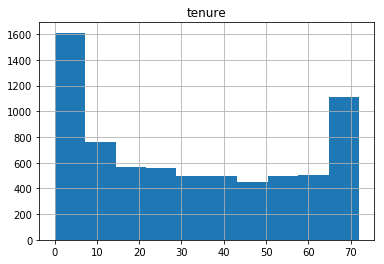

In [26]:
#Data Exploration
data.hist('tenure')

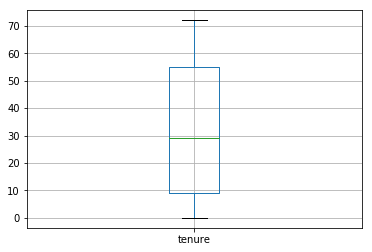

In [27]:
data.boxplot('tenure')

In [28]:
data.Contract.value_counts()

0    3886
2    1685
1    1472
Name: Contract, dtype: int64

In [29]:
pd.crosstab(data.Contract,data.Churn)

Churn,0,1
Contract,,
0,2231,1655
1,1306,166
2,1637,48


In [30]:
data.groupby(['Contract','Churn']).tenure.mean()

Contract  Churn
0         0        20.929628
          1        14.016918
1         0        41.705972
          1        44.963855
2         0        56.948687
          1        61.270833
Name: tenure, dtype: float64

In [31]:
data.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [32]:
data.TotalCharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

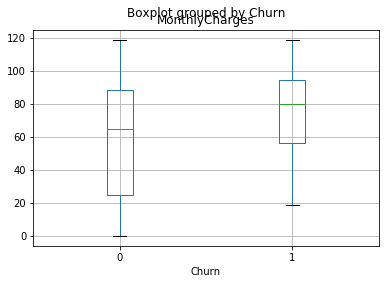

In [33]:
data.boxplot(column = 'MonthlyCharges' , by = 'Churn')

In [34]:
help(data.boxplot)

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. The position of the whiskers
    is set by default to `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box.
    Outlier points are those past the end of the whiskers.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.
    
    Parameters
    ----------
    column

In [35]:
pd.crosstab(data.gender,data.Churn)

Churn,0,1
gender,,
0,2630,930
1,2544,939


In [36]:
pd.crosstab(data.InternetService,data.Churn)

Churn,0,1
InternetService,,
0,1418,113
1,1957,459
2,1799,1297


In [37]:
pd.crosstab(data.SeniorCitizen,data.Churn)

Churn,0,1
SeniorCitizen,,
0,4508,1393
1,666,476


In [38]:
data.groupby(['PaymentMethod','Churn']).tenure.mean()

PaymentMethod  Churn
0              0        31.865134
               1        16.763772
1              0        25.238426
               1         8.055195
2              0        47.214174
               1        26.290698
3              0        46.137316
               1        27.521552
Name: tenure, dtype: float64

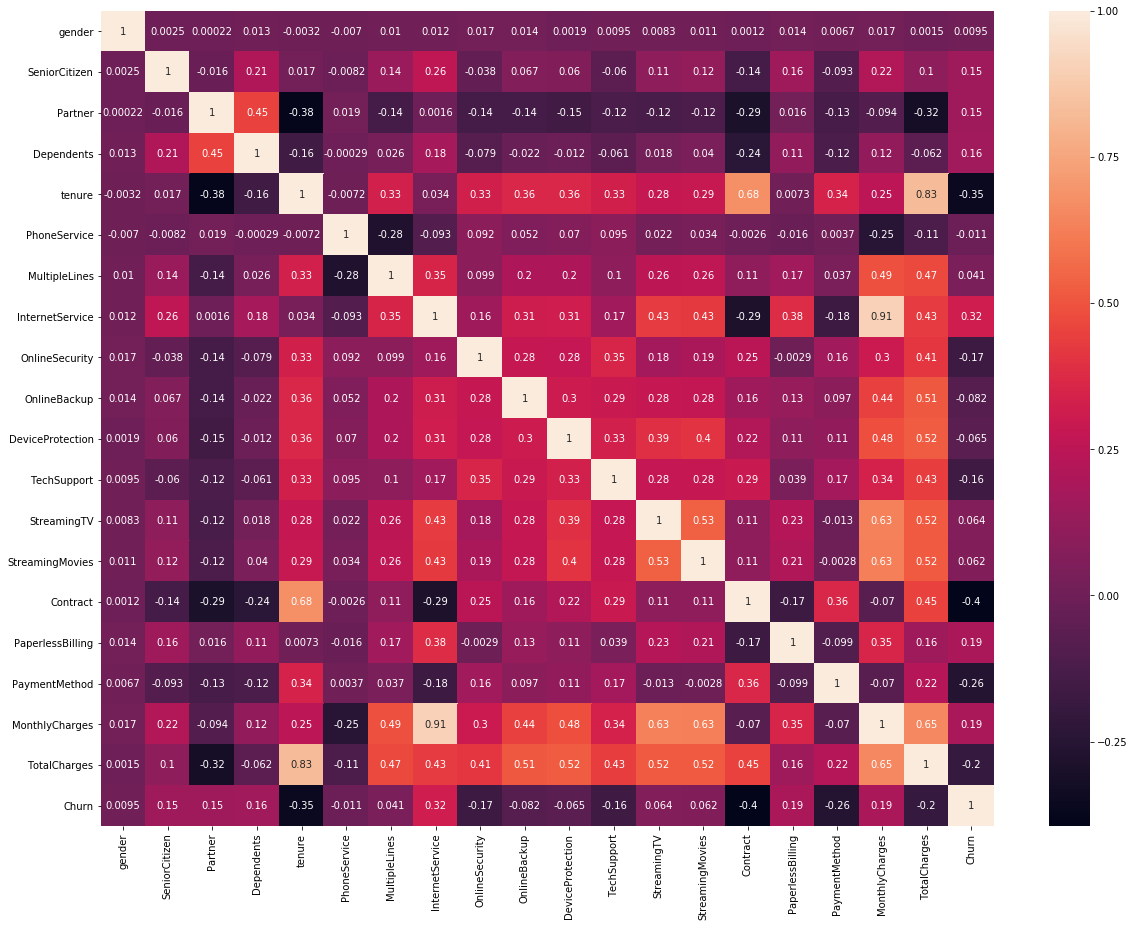

In [39]:
corr = data.corr()
sns.heatmap(corr , xticklabels = corr.columns.values , yticklabels = corr.columns.values ,
           annot = True , annot_kws = {'size' :10})
heat_map = plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [40]:
data.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [41]:
#Predictive Modelling
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size = 0.25)

train_y = train['Churn']
test_y = test['Churn']

train_x = train
train_x.pop('Churn')
test_x = test

test_x.pop('Churn')

2219    0
3155    0
3304    0
191     1
6562    1
6442    0
3321    0
6216    0
5078    0
2575    0
1850    0
3997    0
5059    1
237     0
5728    1
1736    1
5266    0
5326    1
4357    0
346     1
697     1
6360    1
6232    1
2901    0
5775    0
255     0
2555    0
3622    0
1371    1
3163    0
       ..
4773    1
680     1
6749    0
3426    1
5861    0
6056    0
2201    0
1520    0
1190    0
1872    0
3599    0
413     0
1571    0
5075    0
476     0
5933    1
4430    0
169     0
6695    0
5045    0
3760    0
5529    0
4847    1
637     0
4145    0
3626    0
4437    0
6694    0
5499    1
2793    0
Name: Churn, Length: 1761, dtype: int64

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x ,  y = train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y,test_y_pred)
print('Logistic accuracy is %2.2f' % accuracy_score(test_y,logisticRegr.predict(test_x)))
print(classification_report(test_y,test_y_pred))

Logistic accuracy is 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1294
           1       0.64      0.52      0.57       467

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [43]:
train_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4704,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,61.15
1278,0,0,0,0,36,1,0,1,1,0,1,1,1,1,1,0,3,60.70
201,1,0,1,1,14,0,0,2,0,1,0,1,0,0,0,1,3,80.05
2091,1,0,1,0,50,0,0,0,0,0,0,0,0,0,2,0,3,20.15
1172,1,1,0,0,32,0,1,2,0,1,0,0,1,1,0,1,0,100.40


In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score

logisticRegr = LogisticRegression(class_weight = 'balanced')
logisticRegr.fit(X=train_x ,  y = train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y,test_y_pred)
print('Logistic accuracy is %2.2f' % accuracy_score(test_y,logisticRegr.predict(test_x)))
print(classification_report(test_y,test_y_pred))

Logistic accuracy is 0.74
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1294
           1       0.51      0.78      0.62       467

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.76      1761



In [45]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
                                   replace = True,
                                   n_samples = 5174,
                                   random_state = 1)
data_upsampled = pd.concat([data_majority,data_minority_upsampled])
data_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [46]:

train,test = train_test_split(data_upsampled , test_size = 0.25)


train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled , y = train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set : {:.2f}'.
     format(logisticRegr_balanced.score(test_x_upsampled,test_y_upsampled)))

print(classification_report(test_y_upsampled,test_y_pred_balanced))



Accuracy of logistic regression classifier on test set : 0.76
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1298
           1       0.74      0.79      0.76      1289

   micro avg       0.76      0.76      0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587



In [47]:
from sklearn import tree
decision_tree_balanced = tree.DecisionTreeClassifier(max_depth = 5,max_leaf_nodes = 7)
decision_tree_balanced.fit(X=train_x_upsampled , y = train_y_upsampled)

test_y_pred_balanced = decision_tree_balanced.predict(test_x_upsampled)

from sklearn.metrics import accuracy_score

print(accuracy_score(test_y_upsampled , test_y_pred_balanced))

0.761886354851179


In [48]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(test_y_upsampled, test_y_pred_balanced),
    columns =['predicted not churn','Predicted churn'],
    index =['True not churn', 'True  churn']
)

,predicted not churn,Predicted churn
True not churn,995,303
True churn,313,976


In [49]:
dot_data = tree.export_graphviz(decision_tree_balanced,
                               feature_names = train_x_upsampled.columns,
                               out_file='tree.dot',
                               filled=True,
                               rounded=True)

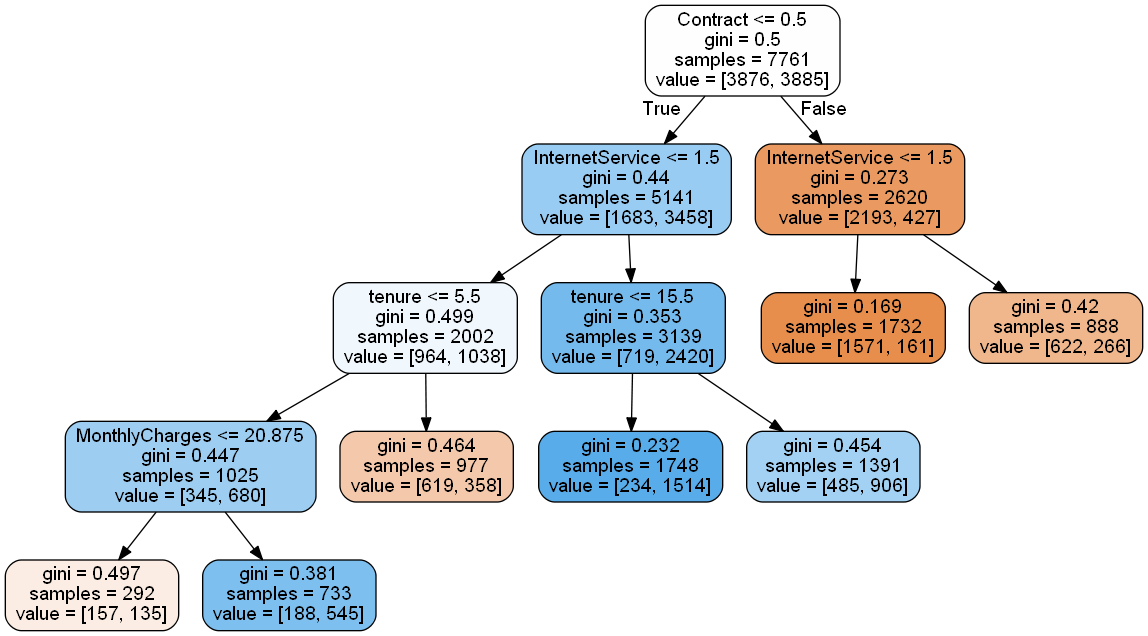

In [50]:
!dot -Tpng tree.dot > tree.png

from IPython.display import Image
Image(filename = 'tree.png')

# Random Forest


In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 1)
model.fit(X=train_x_upsampled ,y= train_y_upsampled)
test_y_pred_balanced = model.predict(test_x_upsampled)

print(accuracy_score(test_y_upsampled , test_y_pred_balanced))

0.8879010436799382


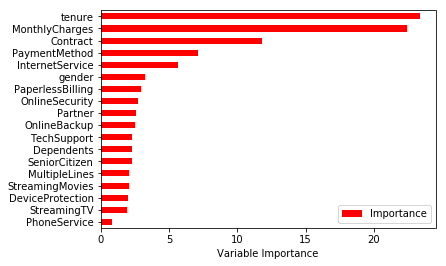

In [55]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100},index = train_x_upsampled.columns)
Importance.sort_values('Importance' , axis = 0 ,ascending = True).plot(kind ='barh' , color = 'r')
plt.xlabel('Variable Importance')
plt.gca().Legend_ = None 

In [58]:
X_train = train_x_upsampled[['tenure','Contract','MonthlyCharges','PaymentMethod','InternetService']] 
X_train.head()

,tenure,Contract,MonthlyCharges,PaymentMethod,InternetService
5635,22,0,54.70,1,1
4182,29,0,98.65,0,2
5209,72,2,109.95,3,2
1273,49,0,88.20,0,2
2617,1,0,19.60,1,0


In [60]:
y_train = train_y_upsampled

In [62]:
y_train.head()

5635    0
4182    1
5209    0
1273    0
2617    1
Name: Churn, dtype: int64

In [63]:
X_test = test_x_upsampled[['tenure','Contract','MonthlyCharges','PaymentMethod','InternetService']]
X_test.head()

,tenure,Contract,MonthlyCharges,PaymentMethod,InternetService
4343,8,0,75.75,0,2
3241,1,0,20.10,1,0
3837,4,1,105.65,0,2
2791,57,2,74.35,2,1
2631,7,0,99.25,0,2


In [64]:
y_test = test_y_upsampled

In [65]:
y_test.head()

4343    1
3241    1
3837    1
2791    0
2631    1
Name: Churn, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 1)
model1.fit( X_train,y_train)
test_y_pred = model1.predict(X_test)

print(accuracy_score(y_test , test_y_pred))

0.8724391186702745


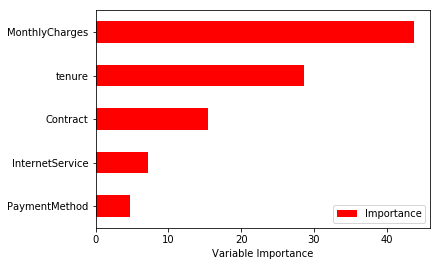

In [67]:
Importance = pd.DataFrame({'Importance':model1.feature_importances_*100},index = X_train.columns)
Importance.sort_values('Importance' , axis = 0 ,ascending = True).plot(kind ='barh' , color = 'r')
plt.xlabel('Variable Importance')
plt.gca().Legend_ = None 

In [69]:
from sklearn.metrics import classification_report 
print(classification_report(y_test , test_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1298
           1       0.83      0.93      0.88      1289

   micro avg       0.87      0.87      0.87      2587
   macro avg       0.88      0.87      0.87      2587
weighted avg       0.88      0.87      0.87      2587

